<a href="https://colab.research.google.com/github/fabizap/fabizap/blob/main/2da%20parte%20del%201%20Trabajo_Pr%C3%A1ctico_entregable_Parte_1_Grupo_23_Consolidado_v_2022_04_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1 - Grupo 23

**Integrantes:** Franco Amilcar Genolet (francogeno97@gmail.com), Fabian Alejandro Zapata Cerutti (fzc501@gmail.com), Luis Alejandro Guedez Gomez (luis.guedez@dicsys.com), María Laura Mantovani (mantovanimlaura@gmail.com).

# Ejercicio 1 - Análisis descriptivo - Consigna

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

# Resolución

In [110]:
#Importamos las librerías que necesitamos para trabajar
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
seaborn.set_context('talk')
pd.options.display.float_format = '{:,.1f}'.format

In [111]:
#Lectura del dataset
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

######Para responder a la pregunta de cuáles son las variables de interés, comenzamos revisando las columnas de nuestro dataset. Vemos la cantidad de nulos, de ceros y de datos únicos para cada variable:

In [112]:
def status(data):

    data2=data 

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total unique values
    d2['unique']=data2.nunique().values
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

In [113]:
pd.options.display.float_format = '{:,.1f}'.format
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,profile_gender,0,0.0,0,0.0,3,object
1,profile_age,0,0.0,0,0.0,50,int64
2,work_country,0,0.0,0,0.0,1,object
3,work_province,0,0.0,0,0.0,25,object
4,profile_years_experience,0,0.0,318,0.1,59,float64
5,work_years_in_company,0,0.0,1538,0.3,45,float64
6,work_years_in_current_position,0,0.0,1324,0.2,43,float64
7,work_people_in_charge_of,0,0.0,4592,0.8,51,int64
8,profile_studies_level,0,0.0,0,0.0,7,object
9,profile_studies_level_state,0,0.0,0,0.0,3,object


Luego de esta exploración de las columnas del dataset, sabemos que nuestras columnas o variables de interés para responder a la pregunta son: 
1. Lenguajes de programación: `tools_programming_languages`, y 
2. Salario (Bruto o Neto): `salary_monthly_BRUTO` y `salary_monthly_NETO`
En la tabla anterior vimos que el salario Neto tiene 212 valores nulos, con lo cual parece mejor opción para el análisis considerar el salario Bruto por ser mas completo.

In [114]:
#armamos un dataset con nuestras columnas relevantes
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO']

En cuanto a la columna que contiene información sobre los lenguajes de programación utilizados (`tools_programming_languages`), sabemos que sus valores son strings con los lenguajes seleccionados separados por comas. Necesitamos separarlos para poder hacer un análisis comparativo entre lenguajes.



In [115]:
#Vemos las primeras 3 filas a modo de ejemplo
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

######Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen. Además, crea un nuevo dataset llamado `df_lang` en el que agrega a nuestro dataset `relevant_columns` recientemente creado dos columnas nuevas: una llamada `cured_programming_languages` y otra (creada a partir de esta última) llamada `programming_language`. 

In [116]:
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')\
    .replace('ninguno', '')
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})


######Vemos cómo quedó este nuevo dataset `df_lang` revisando sus primeras 5 filas.

---



In [117]:
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
1,html,"HTML, Javascript, Python","79,000.0","[html, javascript, python]"
1,javascript,"HTML, Javascript, Python","79,000.0","[html, javascript, python]"
1,python,"HTML, Javascript, Python","79,000.0","[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","130,000.0","[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","130,000.0","[bash/shell, c, css, html, java, javascript, p..."


Se observa que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

#####A continuación revisamos la cantidad de veces que se repite cada lenguaje en nuestro dataframe `df_lang` para empezar a aproximarnos a los lenguajes de programación más frecuentemente manejados por los encuestados. Vemos los 15 lenguajes más frecuentes entre los encuestados:

In [118]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:30]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


##Podemos ver estos datos en un gráfico de barras: 

Text(0.5, 1.0, 'Lenguajes de programación o tecnologías que manejan')

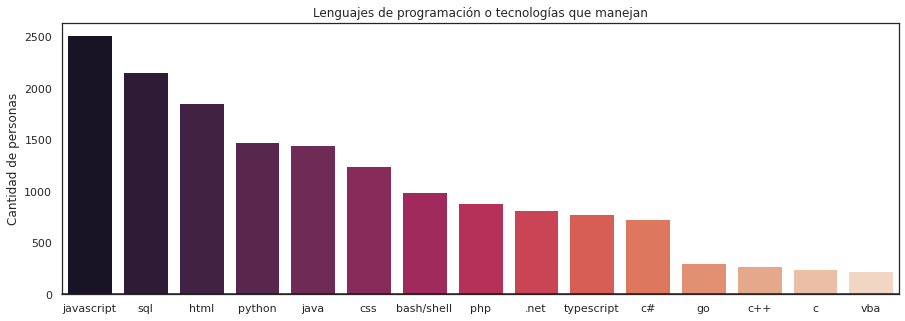

In [119]:
seaborn.set_theme(style="white")
aux = language_count[:15]
filtered_language_count = aux.sort_values(by='frequency',ascending=False,inplace=False)

x = numpy.array(list(filtered_language_count['language']))
y1 = numpy.array(list(filtered_language_count['frequency']))
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

seaborn.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Cantidad de personas")
ax1.set_title("Lenguajes de programación o tecnologías que manejan")

En el gráfico se ve una caída fuerte en la frecuencia de encuestados a partir del lenguaje `go`. En la tabla anterior podemos ver que 734 de los encuestados dijeron programar en `c#`, representando el 12% del total de encuestados (6095) mientras que la cantidad de encuestados que programa en `go` solo representa el 5% de la muestra. Por esto decidimos cortar nuestro listado de programas relevantes en los 11 primeros.

In [120]:
#Redefinimos los lenguajes más frecuentes para que sean 11
aux1 = language_count[:11]
filtered_language_count = aux1.sort_values(by='frequency',ascending=False,inplace=False)
x = numpy.array(list(filtered_language_count['language']))

##Filtramos entonces las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages` que contiene los 11 lenguajes seleccionados y creamos un nuevo dataset a partir de `df_lang` llamado `filtered_df_lang`.

In [121]:
#Creamos nuestro dataset filtrado y vemos las primeras 5 filas
interesting_languages = x
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
1,html,"HTML, Javascript, Python","79,000.0","[html, javascript, python]"
1,javascript,"HTML, Javascript, Python","79,000.0","[html, javascript, python]"
1,python,"HTML, Javascript, Python","79,000.0","[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","130,000.0","[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","130,000.0","[bash/shell, c, css, html, java, javascript, p..."


##Ahora veamos medidas de tendencia central y de dispersión de la variable de interés `salary_monthly_BRUTO` con respecto a estos 11 lenguajes de programación.

In [122]:
pd.options.display.float_format = '{:,.0f}'.format
filtered_df_lang.groupby('programming_language').describe().round()

salary_monthly_BRUTO                                     \
                                    count    mean     std min    25%     50%   
programming_language                                                           
.net                                  823 116,507  97,341   1 63,000  94,377   
bash/shell                            993 145,670 146,312   2 73,000 115,000   
c#                                    734 116,789 108,548   1 62,732  92,247   
css                                 1,247 118,567 125,576   1 60,000  90,000   
html                                1,861 117,607 118,094   1 60,000  90,000   
java                                1,453 135,575 123,882   1 70,000 112,000   
javascript                          2,513 130,110 132,336   1 63,000 100,000   
php                                   891 118,010 105,128   1 60,000  90,000   
python                              1,475 146,513 135,523   1 75,000 115,000   
sql                                 2,154 119,939 120,796   1 61,000  95,000   
typescript                            779 149,161 169,341   1 69,500 110,000   

                                        
                         75%       max  
programming_language                    
.net                 140,000 1,033,000  
bash/shell           165,000 2,080,000  
c#                   139,412 1,680,000  
css                  139,250 2,080,000  
html                 135,000 2,080,000  
java                 165,000 2,180,000  
javascript           150,000 2,180,000  
php                  140,000   975,000  
python               170,000 1,680,000  
sql                  140,000 2,180,000  
typescript           163,148 2,180,000

En la tabla vemos que el Salario mensual Bruto mínimo para estos 11 lenguajes es de $1. Asumimos que estos datos son equivalentes a "Ns/Nc". Asimismo, para la mayoría de estos lenguajes el sueldo máximo supera los 2 millones, lo cual resulta muy diferente de la Media.

##A continuación y tal como se observó en la tabla antes expuesta, el boxplot nos muestra una fuerte presencia de valores extremos máximos.

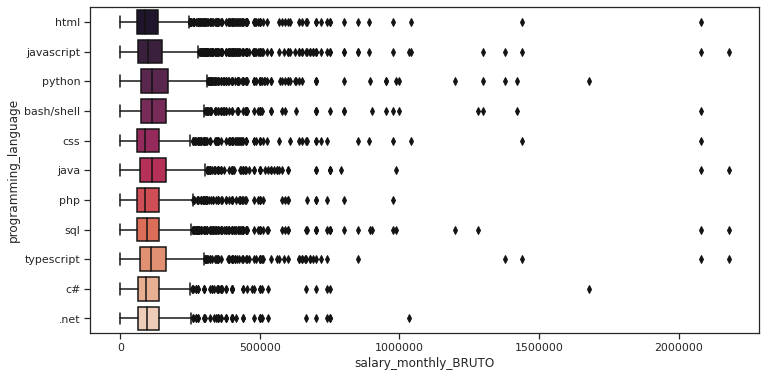

In [123]:
seaborn.set_theme(style="ticks")
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=filtered_df_lang, x="salary_monthly_BRUTO", y="programming_language",
                palette="rocket")
plt.ticklabel_format(style='plain', axis='x')

A continuación vemos graficada la mediana como medida más robusta y menos influenciable por estos datos extremos. 

In [124]:
language_medians = filtered_df_lang.groupby('programming_language').median()\
    .reset_index()\
    .rename(columns={'programming_language': 'language', 'salary_monthly_BRUTO': 'median'})

##aa

Text(0.5, 1.0, 'Mediana de Salario Mensual BRUTO para los lenguajes de programación o tecnologías más frecuentes')

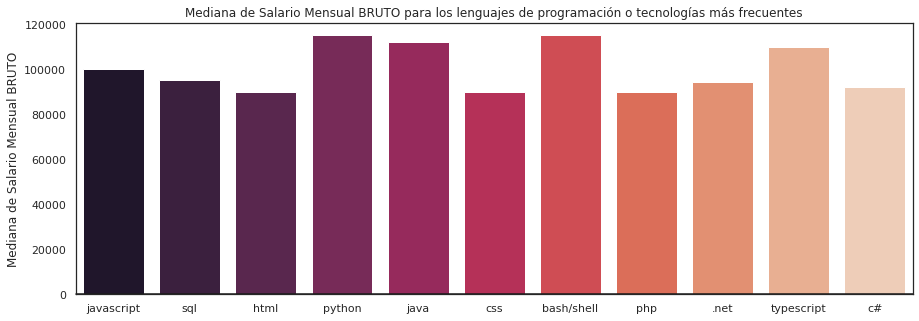

In [125]:
seaborn.set_theme(style="white")
x = numpy.array(list(language_medians['language']))
y = numpy.array(list(language_medians['median']))
ord = numpy.array(list(filtered_language_count['language']))
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

seaborn.barplot(x=x, y=y, palette="rocket", ax=ax1, order = ord)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Mediana de Salario Mensual BRUTO")
ax1.set_title("Mediana de Salario Mensual BRUTO para los lenguajes de programación o tecnologías más frecuentes")

En la gráfica se observa que los lenguajes `phyton`, `java` y `bash/shell` son los mejor remunerados. Por el contrario, la mediana del Salario Mensual BRUTO es menor para `html`, `css` y `php`.

In [126]:
# ESTO NO ME QUEDA MUY CLARO PARA QUÉ LO HICIMOS. Mientras tanto lo dejo comentado.

filtered=filtered_df_lang[['programming_language', 'salary_monthly_BRUTO']]
filtered[:5]

,programming_language,salary_monthly_BRUTO
1,html,"79,000"
1,javascript,"79,000"
1,python,"79,000"
3,bash/shell,"130,000"
3,css,"130,000"


In [127]:
# ESTO QUE SIGUE PARA MI YA ESTÁ RESUELTO CON LA TABLA DE ARRIBA, les parece que lo saquemos? Mientras tanto lo comenté

#filtered.reset_index(inplace=True)
#dfl=df.groupby(filtered['programming_language'])[['salary_monthly_BRUTO']].sum() ##sacar medio del salario  
#dfl_int=dfl.describe().round()
#dfl_int

In [128]:
#dfl_int=dfl.astype(int)
#df_val_order=dfl_int.sort_values('salary_monthly_NETO',ascending=False)[:10]
#df_val_order ##sacar por promedio

In [129]:
#seaborn.displot(filtered_df_lang['programming_language'][:50].dropna(),
#                 stat='count', aspect=4) ##ordenar por mayor frecuencia

In [130]:
#Agregar grafica por salario promedio y por mediana.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

In [131]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [165]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3,3,3,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5,2,2,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2,0,0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [133]:
salary_col = 'salary_monthly_NETO'

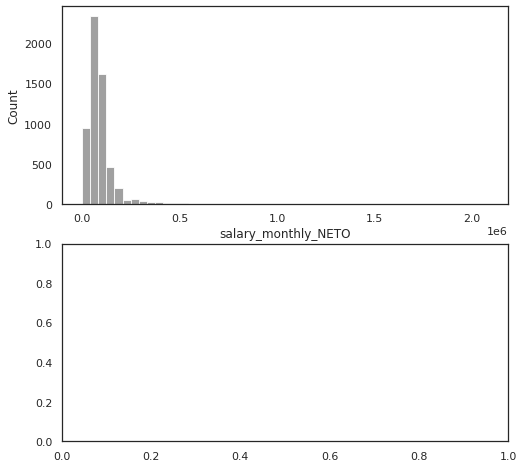

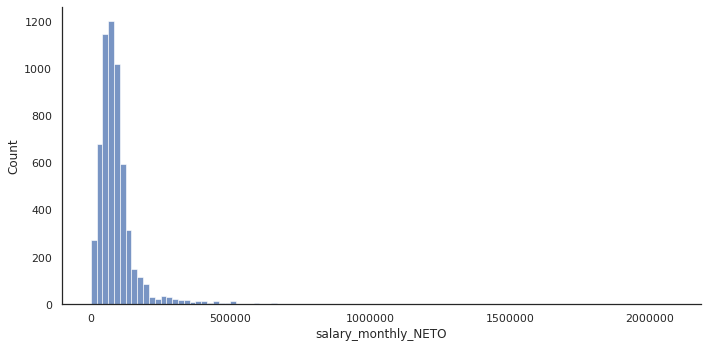

In [134]:
fig, axes = plt.subplots(nrows=2, figsize=(8, 8))
seaborn.histplot(df[salary_col], bins=50, ax=axes[0], color='gray')

seaborn.displot(df[salary_col], bins=100, aspect=2) #cambiar los bins=5,20 0 50 y ver...
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')



Histograma de recomendaciones ( o algo asi!)
Se observa que la mayoria recomienda su empresa para trabajar??

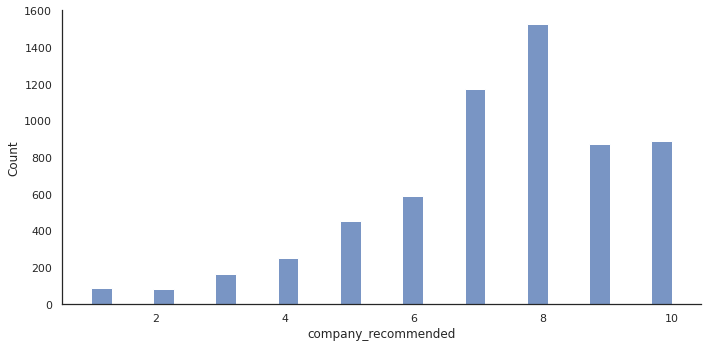

In [135]:
RECOMIENDAN_col = 'company_recommended'
seaborn.displot(df[RECOMIENDAN_col], aspect=2) #cambiar los bins=5,20 0 50 y ver...

ESTADISTICAS DESCRIPTIVAS


In [136]:
df[RECOMIENDAN_col].describe().apply(lambda s: '{0:.3f}'.format(s))

count    6095.000
mean        7.340
std         2.024
min         1.000
25%         6.000
50%         8.000
75%         9.000
max        10.000
Name: company_recommended, dtype: object

MEDIA Y MEDIANA DE LAS RECOMENDACIONES
si no coinciden es porque la distribución no es simétrica

In [137]:
df[RECOMIENDAN_col].mean(), df[RECOMIENDAN_col].median()

(7.340114848236259, 8.0)

Lo mismo para a;os de experiencia


VALORACIONES Y LENGUAJES (NO SE SI SUMA LAS VALORACIONES QUE RECIBIO CADA PROGRAMA, O SI CUENTA CUANTOS ENCUESTADOS VALORARON EL LENGUAJE)

In [138]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Valoracion recom', 'company_recommended': 'frequency'})
language_count[:30]

,Valoracion recom,programming_language
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


HISTOGRAMA DE A;OS DE EXPERIENCIA

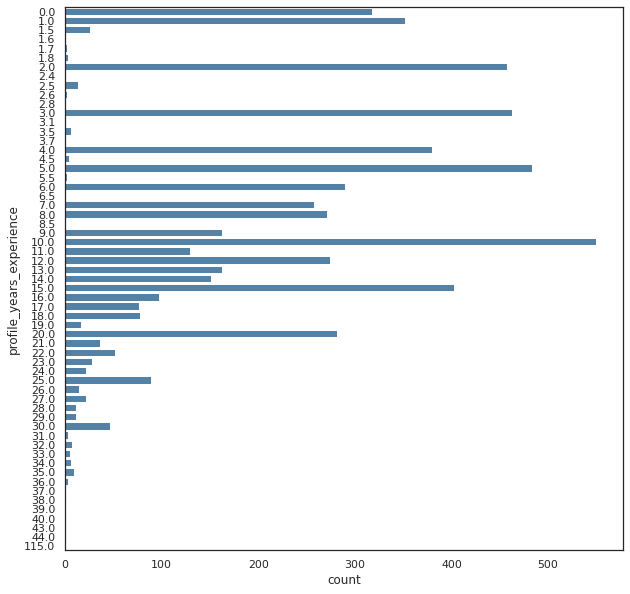

In [139]:
#Conteos de Datos que no son numéricos, datos categóricos. Pueden ser ordinales o no ordinales.
fig = plt.figure(figsize=(10, 10))
seaborn.countplot(y=df.profile_years_experience	, color='steelblue')

<Figure size 432x288 with 0 Axes>

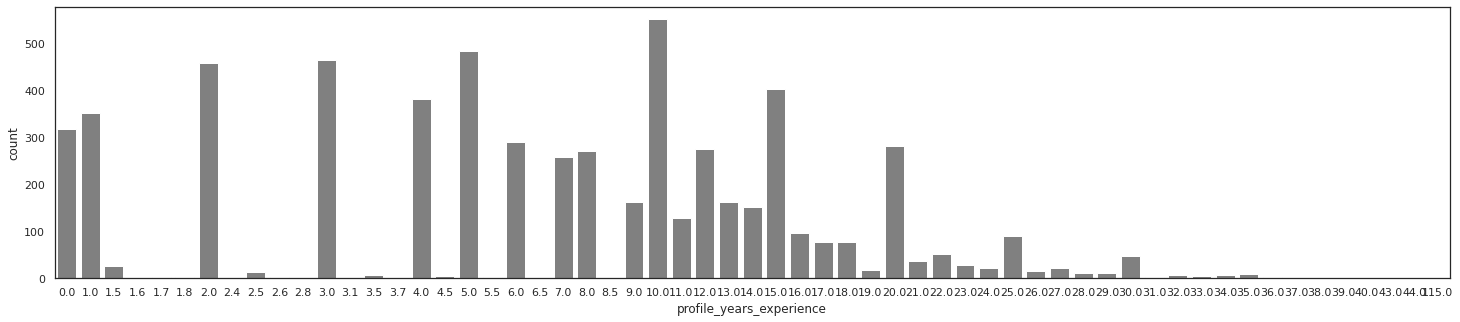

In [140]:
plt.figure()
fig = plt.figure(figsize=(25, 5))
seaborn.countplot(x=df.profile_years_experience, color='GREY')
#for ax in axes:
plt.tick_params(labelrotation=0)

In [141]:
experiencia_col = 'profile_years_experience'

In [142]:
df[experiencia_col].describe().apply(lambda s: '{0:.3f}'.format(s))

count    6095.000
mean        8.931
std         7.161
min         0.000
25%         3.000
50%         7.000
75%        13.000
max       115.000
Name: profile_years_experience, dtype: object

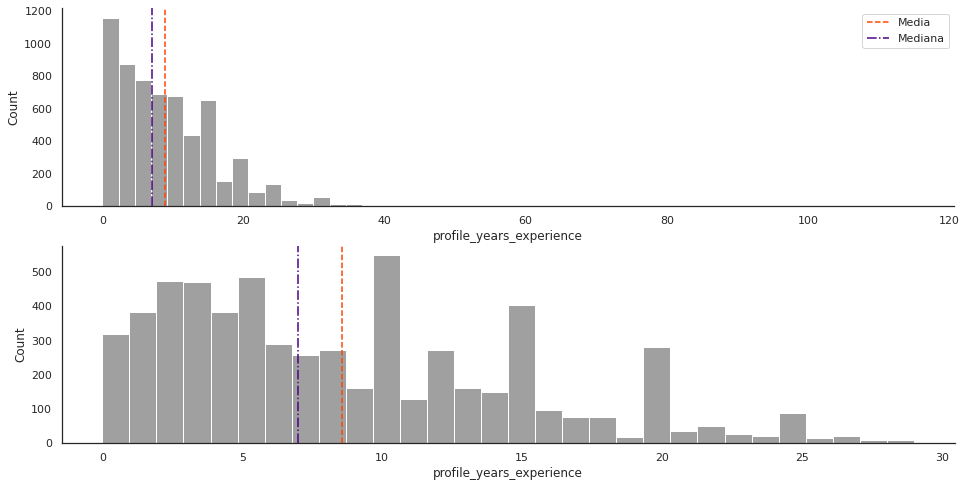

In [143]:
## La diferencia no siempre se aprecia en los gráficos
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
seaborn.histplot(df[experiencia_col], bins=50, ax=axes[0], color='gray')
axes[0].axvline(df[experiencia_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[experiencia_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

filtered_df = df[df[experiencia_col] < 30]
seaborn.histplot(filtered_df[experiencia_col], bins=30, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[experiencia_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[experiencia_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

In [144]:
df[['company_recommended', 'profile_years_experience']].describe().round()

,company_recommended,profile_years_experience
count,"6,095","6,095"
mean,7,9
std,2,7
min,1,0
25%,6,3
50%,8,7
75%,9,13
max,10,115


GRAFICOS DE CAJA

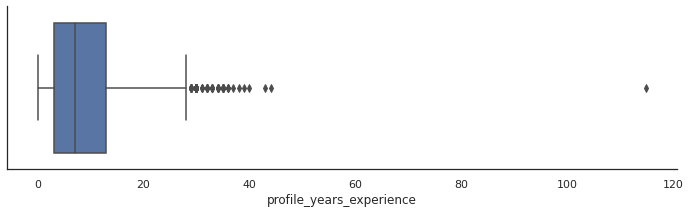

In [145]:
plt.figure(figsize=(12, 3))
seaborn.boxplot(x=df[experiencia_col])
seaborn.despine()

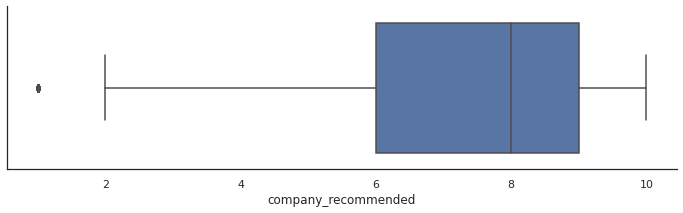

In [146]:
plt.figure(figsize=(12, 3))
seaborn.boxplot(x=df[RECOMIENDAN_col])
seaborn.despine()

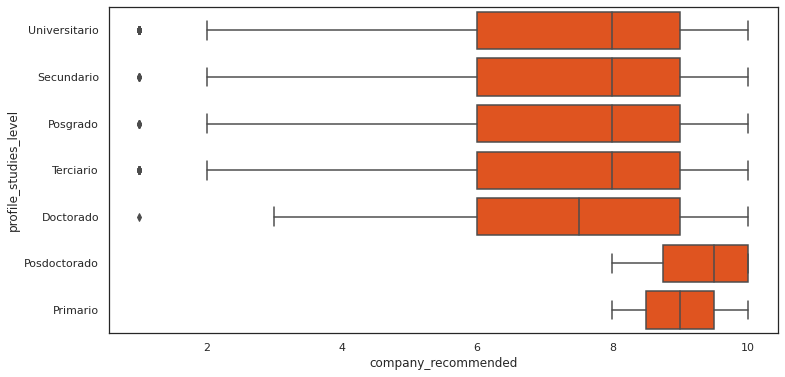

In [147]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=RECOMIENDAN_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

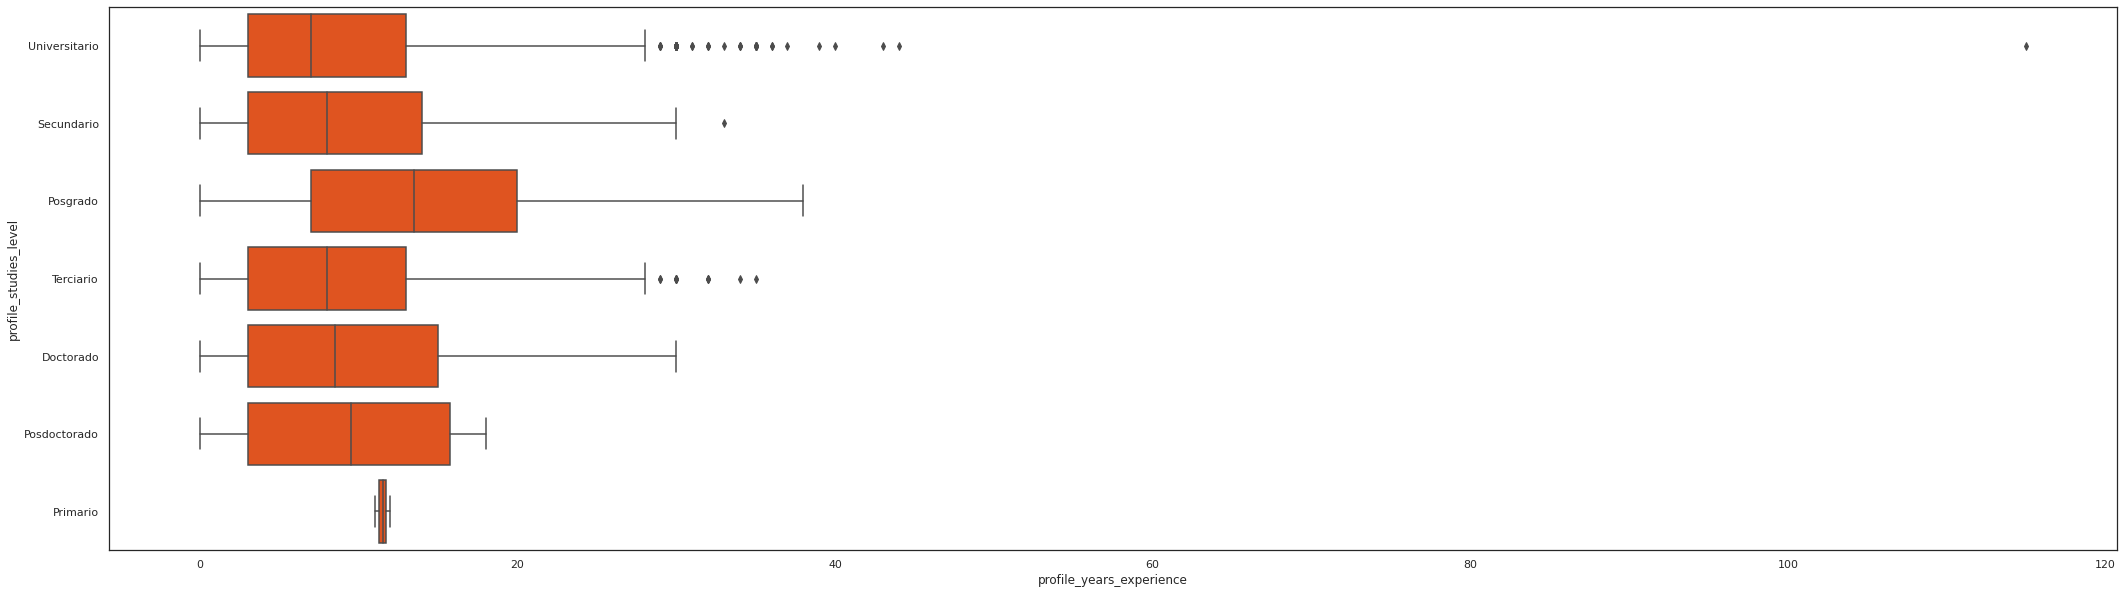

In [148]:
plt.figure(figsize=(36, 10))
seaborn.boxplot(data=df, x=experiencia_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

BOXENPLOT

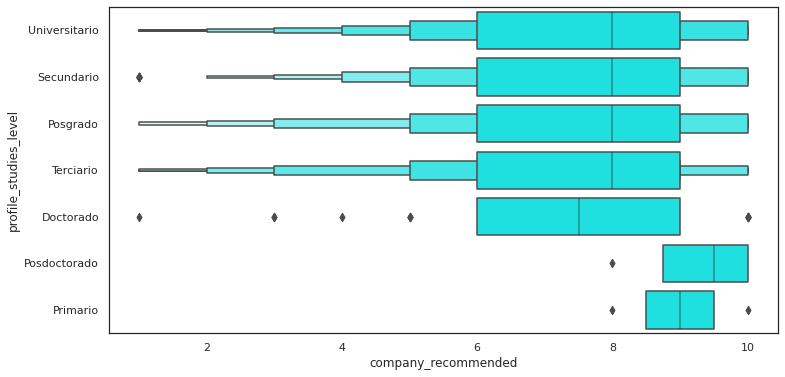

In [149]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=df, x=RECOMIENDAN_col, y='profile_studies_level',
                color='CYAN')
plt.ticklabel_format(style='plain', axis='x')

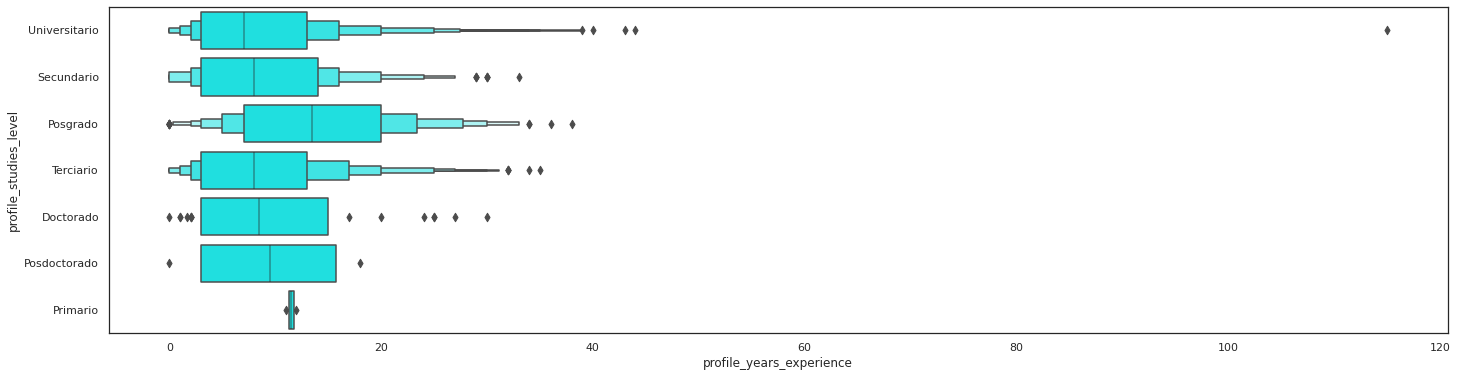

In [150]:
plt.figure(figsize=(24, 6))
seaborn.boxenplot(data=df, x=experiencia_col, y='profile_studies_level',
                color='cyan')
plt.ticklabel_format(style='plain', axis='x')

PERCENTILES

Eliminación de valores extremos
Usando percentiles
Una forma conservadora de eliminar valores extremos que estén afectando a la media, el rango y las visualizaciones es seleccionar un cierto porcentaje más extremo. Para eso, usamos los percentiles.

Por ejemplo, podemos elegir quedarnos con el 99% de salarios más bajos, eliminando el 1%. Podemos calcular todos los percentiles para decidir cuál sería el más apropiado.

In [151]:
k = 95
percentile_95 = df[experiencia_col].quantile(k / 100)
n_below = len(df[df[experiencia_col] < percentile_95])
n_above = len(df[df[experiencia_col] > percentile_95])
print('Percentil {} de la columna {}: {}'.format(k, experiencia_col, percentile_95))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))

Percentil 95 de la columna profile_years_experience: 22.0
% de datos menor que percentil 95: 0.9447087776866284
% de datos mayor que percentil 95: 0.04675963904840033


In [152]:
df[experiencia_col].quantile([.95, .98, .99, .995, .998])

1   22
1   27
1   30
1   32
1   35
Name: profile_years_experience, dtype: float64

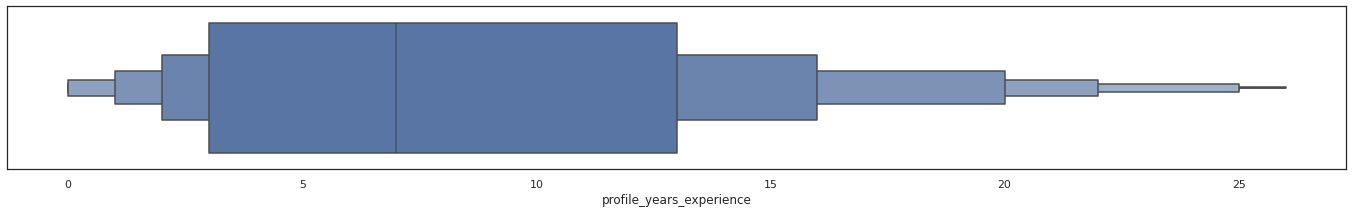

In [153]:
plt.figure(figsize=(24, 3))
max_limit = df[experiencia_col].quantile(.98)
seaborn.boxenplot(x=df[df[experiencia_col] < max_limit][experiencia_col])

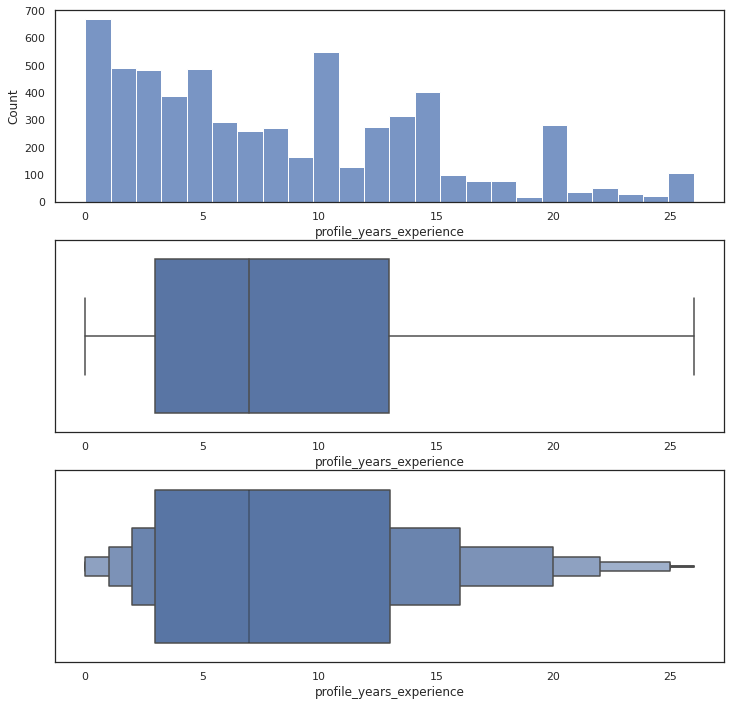

In [154]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = df[experiencia_col].quantile(.98)
data = df[df[experiencia_col] < max_limit][experiencia_col]
seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])

¡Mirando los datos!
¿Quiénes son los que tienen tanta experiencia?

In [155]:
df[df[experiencia_col] > df[experiencia_col].quantile(0.98)]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
30,Hombre,53,Argentina,GBA,30,10,10,5,Universitario,En curso,...,En un trabajo anterior,Heterosexual,NaN,NaN,201-500,Otras industrias,6,1,"Abono de celular, Comidas pagas / subvencionad...",NaN
43,Hombre,45,Argentina,Córdoba,29,2,2,0,Universitario,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,9,7,Clases de idiomas,NaN
60,Hombre,50,Argentina,Ciudad Autónoma de Buenos Aires,30,4,4,24,Universitario,Incompleto,...,En un trabajo anterior,¿Qué les importa?,NaN,NaN,1-10,Producto basado en Software,9,6,"Cuota para universidad / posgrados, Horarios f...",NaN
342,Hombre,49,Argentina,Provincia de Buenos Aires,31,15,0,4,Universitario,Incompleto,...,En mi trabajo actual,¿Qué les importa?,NaN,NaN,5001-10000,Otras industrias,9,5,"Licencia de paternidad/maternidad extendida, 4...",NaN
362,Hombre,47,Argentina,Mendoza,30,13,5,5,Posgrado,En curso,...,En mi trabajo actual,Heterosexual,NaN,NaN,5001-10000,Otras industrias,7,3,"Capacitaciones y/o cursos, Clases de idiomas, ...",Eventbrite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5779,Mujer,52,Argentina,Ciudad Autónoma de Buenos Aires,30,1,1,0,Universitario,Completado,...,Jamás,¿Qué les importa?,NaN,No,2001-5000,Otras industrias,8,8,Comidas pagas / subvencionadas,NaN
5878,Hombre,54,Argentina,Ciudad Autónoma de Buenos Aires,36,34,8,2500,Posgrado,Completado,...,Jamás,Heterosexual,NaN,NaN,10001+,Otras industrias,7,5,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
5970,Hombre,57,Argentina,Ciudad Autónoma de Buenos Aires,38,0,0,4,Posgrado,Completado,...,Jamás,Heterosexual,Visual,No,2001-5000,Servicios / Consultoría de Software / Digital,6,9,"Capacitaciones y/o cursos, Clases de gimnasia ...",No sabría decirte
6002,Mujer,54,Argentina,Provincia de Buenos Aires,30,23,10,2,Universitario,Completado,...,Jamás,Heterosexual,NaN,NaN,11-50,Otras industrias,1,1,Capacitaciones y/o cursos,NaN


# DESCRIPTIVA

vamos a ver recomendacion vs salario


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




Varias Variables
Varias Categóricas

In [156]:
## Tabla de contingencia
pd.crosstab(df.work_province, df.profile_studies_level)#, normalize=True) #no están ordenados 
#pd.crosstab(df.profile_gender, df.profile_studies_level)[sorted_studies_levels]#ordenados 

profile_studies_level,Doctorado,Posdoctorado,Posgrado,Primario,Secundario,Terciario,Universitario
work_province,,,,,,,
Catamarca,0,0,0,0,0,0,3
Chaco,0,0,0,0,1,4,19
Chubut,0,0,0,0,1,4,18
Ciudad Autónoma de Buenos Aires,18,1,243,1,292,677,2532
Corrientes,0,0,6,0,1,1,11
Córdoba,6,0,21,0,19,99,311
Entre Ríos,1,0,2,0,4,11,48
Formosa,0,0,0,0,0,2,2
GBA,2,0,19,1,56,113,333


Va cuadro de colores heat map

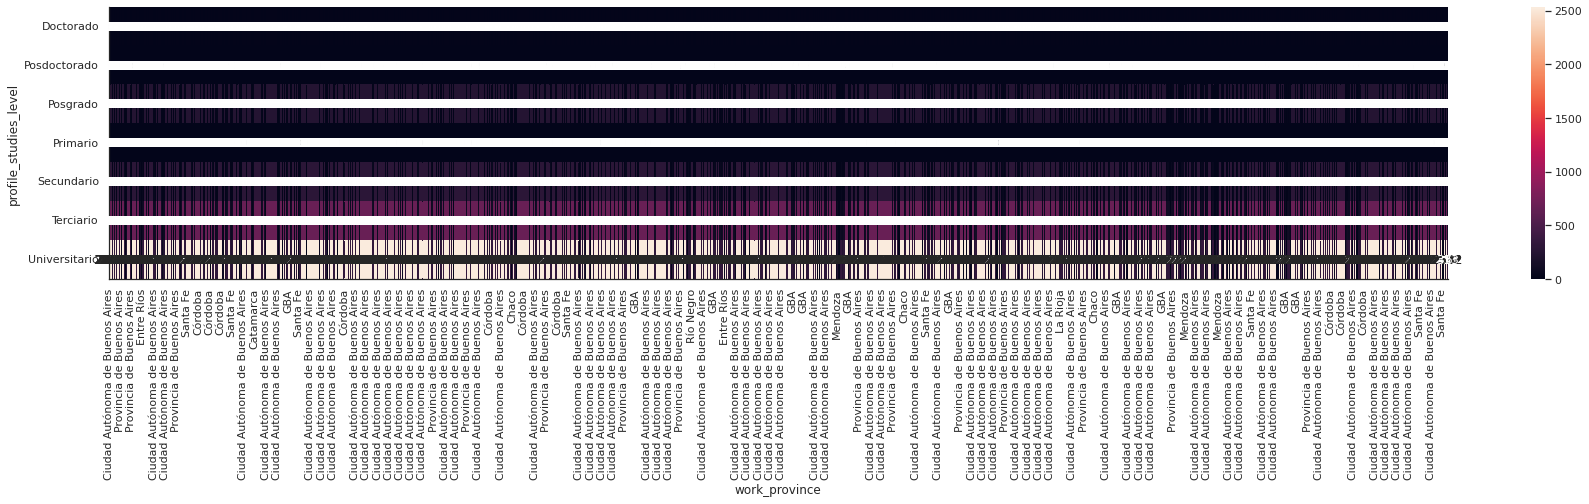

In [161]:
fig = plt.figure(figsize=(30,5))
exp = pd.crosstab(df.profile_studies_level,
                  df.work_province)[df.work_province]
seaborn.heatmap(exp, annot=True, fmt='g')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
seaborn.despine()

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría

Si, hay correlacion
se puede usar una columna
deberiamos sacar los valores atipicos outliers y se veria mejor



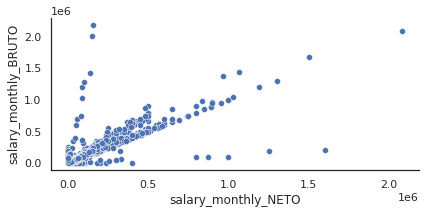

In [162]:
max_age = 99
seaborn.pairplot(data=df[df.profile_age < max_age],
                 y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=3)

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [166]:
#salary_col='salary_monthly_BRUTO' #defino variable con el nombre de la columna de interés
salary_col='salary_monthly_NETO'

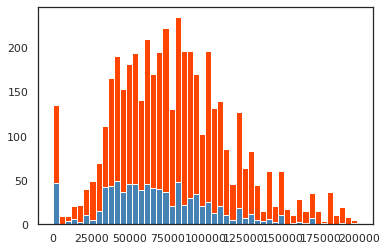

In [167]:
filtered_df= df[df[salary_col] < 200000]
df_H= filtered_df[ filtered_df['profile_gender']=='Hombre'] #poner nivel de estudio nuemeroso por ej universitario
df_M=filtered_df[ filtered_df['profile_gender']=='Mujer'] #poner nivel de estudio menos numeroso, pr ejemplo doctorado/terciario/universitario

plt.hist(df_H[salary_col], color='orangered', bins=50)
plt.hist(df_M[salary_col], color='steelblue', bins=50) #aca importa el orden, cuidado con la superposición
plt.show()

In [159]:
# Ejercicio
# Responder: ¿Si uno tiene más de 5 años de experiencia, la probabilidad de cobrar más que el promedio aumenta? ¿Estos eventos, son independientes?

is_above_avg = df[salary_col] > avg_salary
exp_greater_5 = df.profile_years_experience > 5

intersection_count = len(df[is_above_avg & exp_greater_5])
p_condic_above_avg = len(df[is_above_avg & exp_greater_5])/len(df[exp_greater_5])
print(p_condic_above_avg)

NameError: ignored

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


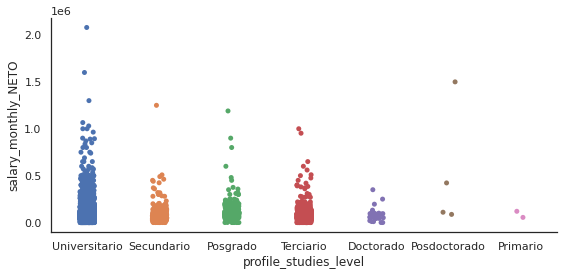

In [190]:
max_age = 60
seaborn.catplot(data=df[df.profile_age < max_age], y='salary_monthly_NETO',  #probar también con profile_age, 'profile_gender'
                x='profile_studies_level', height=4, aspect=2)

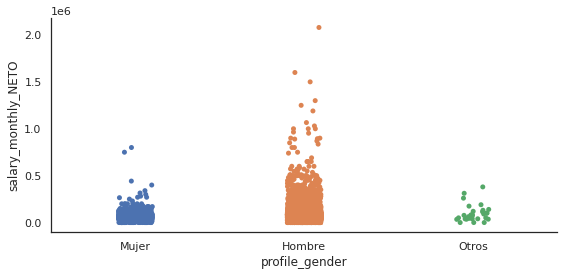

In [194]:
max_age = 99
seaborn.catplot(data=df[df.profile_age < max_age], y='salary_monthly_NETO',  #probar también con profile_age, 'profile_gender'
                x='profile_gender', height=4, aspect=2)